In [2]:
#Measure pitch of all wav files in directory
import glob
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call

In [33]:
influencer_audio = glob.glob('../code/training/influencer_audio/*.mp3')
influencer_audio

['../code/training/influencer_audio/7094004328138067243.mp3',
 '../code/training/influencer_audio/7017066328842358021.mp3',
 '../code/training/influencer_audio/7366018710248672517.mp3',
 '../code/training/influencer_audio/6958587151793556742.mp3',
 '../code/training/influencer_audio/7293648321652985130.mp3',
 '../code/training/influencer_audio/7077566747318062382.mp3',
 '../code/training/influencer_audio/7205233800182271275.mp3',
 '../code/training/influencer_audio/7044307550761946414.mp3',
 '../code/training/influencer_audio/7370414643845549342.mp3',
 '../code/training/influencer_audio/7187523128644406571.mp3',
 '../code/training/influencer_audio/7228337648539061509.mp3',
 '../code/training/influencer_audio/7073541372002798890.mp3',
 '../code/training/influencer_audio/7098727274781904174.mp3',
 '../code/training/influencer_audio/7021521007458503942.mp3',
 '../code/training/influencer_audio/7277685183816633646.mp3',
 '../code/training/influencer_audio/7300089624154721579.mp3',
 '../cod

In [276]:
for file in influencer_audio:
    # if file name id matches "7366018710248672517"
    if file.split('/')[-1].split('.')[0] == "7366018710248672517":
        print(file)
        test_file = file

../code/training/influencer_audio/7366018710248672517.mp3


In [277]:
sound = parselmouth.Sound(test_file)
pitch = call(sound, "To Pitch", 0.0, 75, 600)
pitch_values = pitch.selected_array['frequency']
pitch_values[pitch_values==0] = np.nan
print(pitch_values)

[nan nan nan ... nan nan nan]


In [283]:
for file in influencer_audio[0:1]:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    print(pitch_values)

[nan nan nan ... nan nan nan]


In [284]:
# make pitch.xs() and pitch_values into a dataframe
df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                               columns=['time', 'pitch'])  #add these lists to pandas in the right order

df_pitch

,time,pitch
0,0.020261,NaN
1,0.030261,NaN
2,0.040261,NaN
3,0.050261,NaN
4,0.060261,NaN
...,...,...
1456,14.580261,NaN
1457,14.590261,NaN
1458,14.600261,NaN
1459,14.610261,NaN


In [19]:
import matplotlib.pyplot as plt

In [56]:
import numpy as np

# # Define the function to find rises and peaks using gradient
# def find_rises_and_peaks_gradient(data, threshold=5):
#     pitch_values = data['pitch'].values
#     gradients = np.gradient(pitch_values)
#     rise_points = []
#     peak_points = []
#     in_rise = False
#     rise_start = 0

#     for i in range(1, len(gradients)):
#         if gradients[i] > threshold:
#             if not in_rise:
#                 in_rise = True
#                 rise_start = i-1
#         else:
#             if in_rise:
#                 peak_points.append(i-1)
#                 rise_points.append(rise_start)
#                 in_rise = False

#     return rise_points, peak_points


In [10]:
import numpy as np
import pandas as pd

def find_rises_and_peaks_gradient(data, threshold=4):
    data['rise_point'] = 0
    data['peak_point'] = 0
    
    pitch_values = data['pitch'].values
    gradients = np.gradient(pitch_values)
    
    in_rise = False
    rise_start = 0
    successive_rise_count = 0
    min_successive_rise = 3  # Minimum successive values to qualify as a rise
    checking_rise = False  # Flag to start checking for rises after NaN

    for i in range(1, len(gradients)):
        if np.isnan(pitch_values[i]):
            checking_rise = False  # Reset flag when encountering NaN
            in_rise = False
            successive_rise_count = 0
            continue
        
        if not checking_rise:
            checking_rise = True  # Start checking for rises after NaN
            continue
        
        if gradients[i] >= threshold:
            if not in_rise:
                in_rise = True
                rise_start = i-1
            successive_rise_count += 1
        else:
            if in_rise:
                if successive_rise_count >= min_successive_rise:
                    data.at[rise_start, 'rise_point'] = 1
                    data.at[i-1, 'peak_point'] = 1
                in_rise = False
                successive_rise_count = 0

    return data


In [260]:
# import numpy as np
# import pandas as pd

# def find_rises_and_peaks_gradient(data, threshold=5):
#     data['rise_point'] = 0
#     data['peak_point'] = 0
    
#     pitch_values = data['pitch'].values
#     gradients = np.gradient(pitch_values)
    
#     in_rise = False
#     rise_start = 0
#     successive_rise_count = 0
#     min_successive_rise = 3  # Minimum successive values to qualify as a rise

#     for i in range(1, len(gradients)):
#         if gradients[i] >= threshold:
#             if not in_rise:
#                 in_rise = True
#                 rise_start = i-1
#             successive_rise_count += 1
#         else:
#             if in_rise:
#                 if successive_rise_count >= min_successive_rise:
#                     data.at[rise_start, 'rise_point'] = 1
#                     data.at[i-1, 'peak_point'] = 1
#                 in_rise = False
#                 successive_rise_count = 0

#     return data


In [177]:
# def find_rises_and_peaks_gradient(data, threshold=5):
#     data['rise_point'] = 0
#     data['peak_point'] = 0
    
#     pitch_values = data['pitch'].values
#     #np.gradient at x[i] is x[i+1] - x[i-1] / 2. So it's the average rate of change at any given point 
#     gradients = np.gradient(pitch_values)
    
#     in_rise = False
#     rise_start = 0

#     for i in range(1, len(gradients)):
#         if gradients[i] >= threshold:
#             if not in_rise:
#                 in_rise = True
#                 rise_start = i-1
#         else:
#             if in_rise:
#                 data.at[rise_start, 'rise_point'] = 1
#                 data.at[i-1, 'peak_point'] = 1
#                 in_rise = False

#     return data

In [54]:
# def plot_rises_and_peaks(data, rise_points, peak_points):
#     pitch_values = data['pitch'].values
#     time_values = data['time'].values

#     print(time_values['rise_points'])
    
#     plt.figure(figsize=(12, 6))
#     plt.plot(time_values, pitch_values, label='Pitch Values')
    
#     # Plot rise points
#     plt.scatter(time_values[rise_points], pitch_values[rise_points], color='green', label='Rise Points', zorder=5)
    
#     # Plot peak points
#     plt.scatter(time_values[peak_points], pitch_values[peak_points], color='red', label='Peak Points', zorder=5)
    
#     plt.xlabel('Time')
#     plt.ylabel('Pitch')
#     plt.title('Pitch Values with Rise and Peak Points')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [9]:
def plot_rises_and_peaks(data):
    pitch_values = data['pitch'].values
    time_values = data['time'].values
    
    rise_points = data[data['rise_point'] == 1].index
    peak_points = data[data['peak_point'] == 1].index
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_values, pitch_values, label='Pitch Values')
    
    # Plot rise points
    plt.scatter(time_values[rise_points], pitch_values[rise_points], color='green', label='Rise Points', zorder=5)
    
    # Plot peak points
    plt.scatter(time_values[peak_points], pitch_values[peak_points], color='red', label='Peak Points', zorder=5)
    
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.title('Pitch Values with Rise and Peak Points')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def count_intonations(data):
    intonations = 0
    in_rise = False

    for index, row in data.iterrows():
        if row['rise_point'] == 1:
            in_rise = True
        elif row['peak_point'] == 1 and in_rise:
            intonations += 1
            in_rise = False

    return intonations


In [222]:
df_pitch

,time,pitch
0,0.021791,NaN
1,0.031791,NaN
2,0.041791,NaN
3,0.051791,NaN
4,0.061791,357.9516
...,...,...
1905,19.071791,NaN
1906,19.081791,NaN
1907,19.091791,NaN
1908,19.101791,NaN


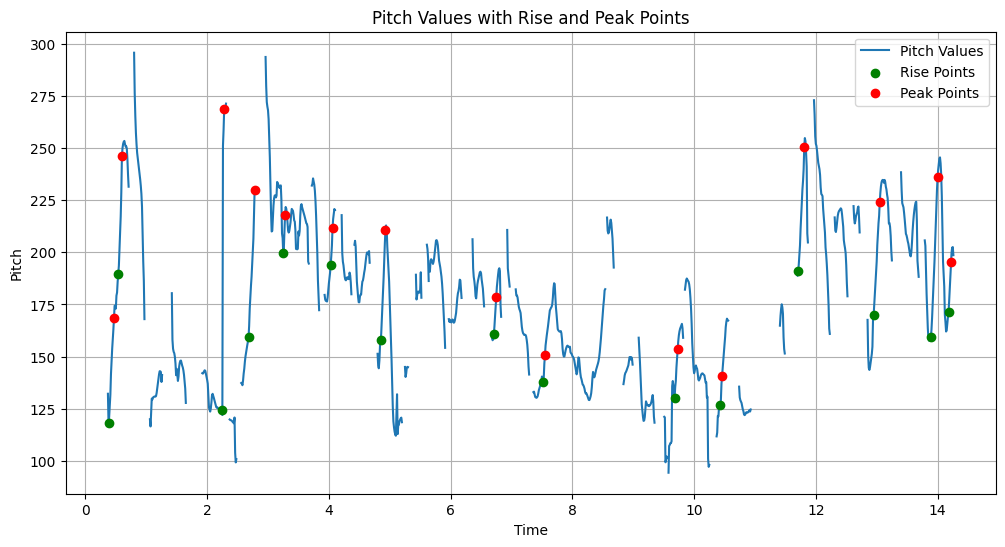

In [287]:
# Find rise and peak points using gradient
function_test = find_rises_and_peaks_gradient(df_pitch)

plot_rises_and_peaks(function_test)

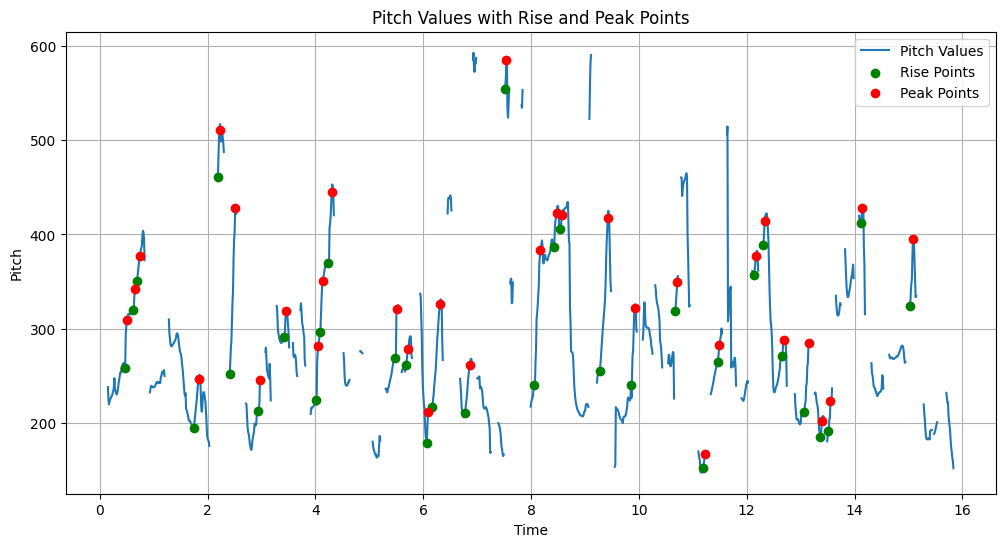

In [281]:
# Find rise and peak points using gradient
function_test = find_rises_and_peaks_gradient(df_pitch)

plot_rises_and_peaks(function_test)

In [268]:
df_pitch

,time,pitch,rise_point,peak_point
0,0.020261,NaN,0,0
1,0.030261,NaN,0,0
2,0.040261,NaN,0,0
3,0.050261,NaN,0,0
4,0.060261,NaN,0,0
...,...,...,...,...
1456,14.580261,NaN,0,0
1457,14.590261,NaN,0,0
1458,14.600261,NaN,0,0
1459,14.610261,NaN,0,0


In [286]:
count_intonations(df_pitch)

15

In [27]:
for file in influencer_audio[1:2]:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    print(pitch_values)

[nan nan nan ... nan nan nan]


In [34]:
influencer_audio[0:1]

['../code/training/influencer_audio/7094004328138067243.mp3']

In [29]:
# make pitch.xs() and pitch_values into a dataframe
df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                               columns=['time', 'pitch'])  #add these lists to pandas in the right order

df_pitch

,time,pitch
0,0.021791,NaN
1,0.031791,NaN
2,0.041791,NaN
3,0.051791,NaN
4,0.061791,357.9516
...,...,...
1905,19.071791,NaN
1906,19.081791,NaN
1907,19.091791,NaN
1908,19.101791,NaN


In [178]:
# Find rise and peak points using gradient
rise_points_gradient, peak_points_gradient = find_rises_and_peaks_gradient(df_pitch)

plot_rises_and_peaks(df_pitch, rise_points_gradient, peak_points_gradient)

ValueError: too many values to unpack (expected 2)

In [37]:
influencer_audio[2:3]

['../code/training/influencer_audio/7366018710248672517.mp3']

In [36]:
for file in influencer_audio[2:3]:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    print(pitch_values)

[nan nan nan ... nan nan nan]


In [38]:
# make pitch.xs() and pitch_values into a dataframe
df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                               columns=['time', 'pitch'])  #add these lists to pandas in the right order

df_pitch

,time,pitch
0,0.022914,NaN
1,0.032914,NaN
2,0.042914,NaN
3,0.052914,NaN
4,0.062914,NaN
...,...,...
1654,16.562914,NaN
1655,16.572914,NaN
1656,16.582914,NaN
1657,16.592914,NaN


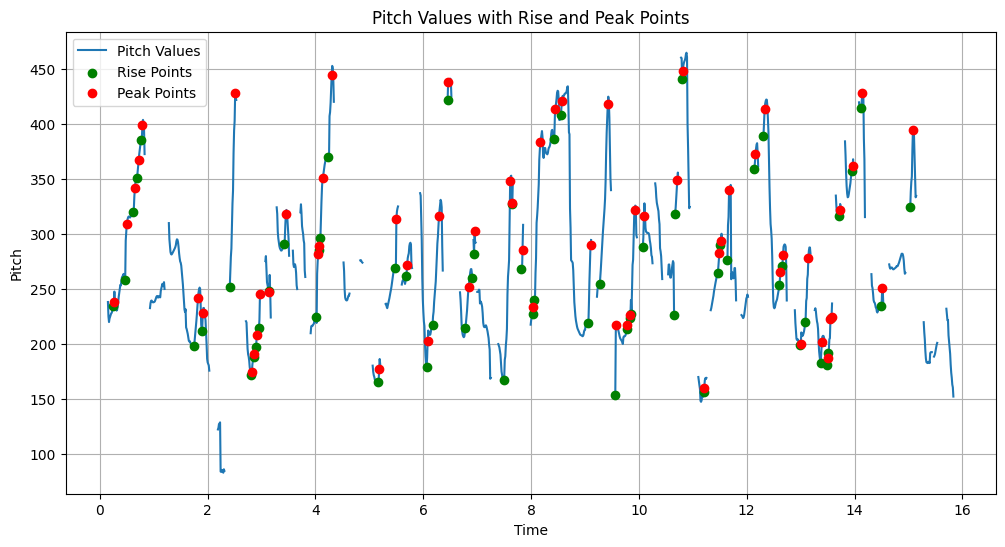

In [39]:
# Find rise and peak points using gradient
rise_points_gradient, peak_points_gradient = find_rises_and_peaks_gradient(df_pitch)

plot_rises_and_peaks(df_pitch, rise_points_gradient, peak_points_gradient)

In [40]:
influencer_audio[3:4]

['../code/training/influencer_audio/6958587151793556742.mp3']

In [41]:
for file in influencer_audio[3:4]:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    print(pitch_values)

[nan nan nan ... nan nan nan]


In [42]:
# make pitch.xs() and pitch_values into a dataframe
df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                               columns=['time', 'pitch'])  #add these lists to pandas in the right order

df_pitch

,time,pitch
0,0.02322,NaN
1,0.03322,NaN
2,0.04322,NaN
3,0.05322,NaN
4,0.06322,NaN
...,...,...
1923,19.25322,160.70828
1924,19.26322,NaN
1925,19.27322,NaN
1926,19.28322,NaN


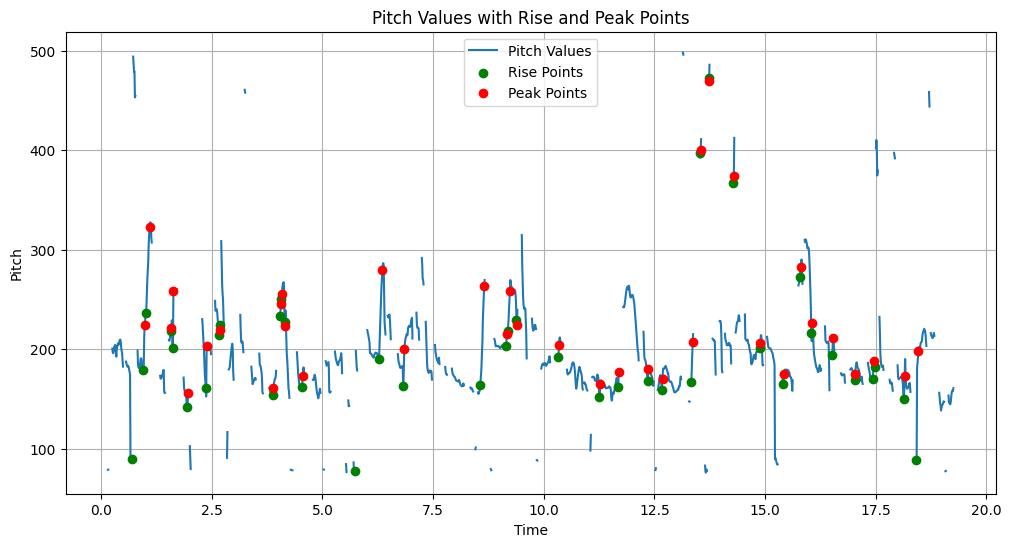

In [43]:
# Find rise and peak points using gradient
rise_points_gradient, peak_points_gradient = find_rises_and_peaks_gradient(df_pitch)

plot_rises_and_peaks(df_pitch, rise_points_gradient, peak_points_gradient)

# Generating pitch values for amazon clips

In [288]:
for file in influencer_audio[:100]:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    # print(pitch_values)

    # make pitch.xs() and pitch_values into a dataframe
    df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                                columns=['time', 'pitch'])  #add these lists to pandas in the right order
    
    # Find rise and peak points using gradient
    df_pitch = find_rises_and_peaks_gradient(df_pitch)

    #export df_pitch to csv
    file_name = file.split('/')[-1].split('.')[0]
    df_pitch.to_csv(f'../code/pitch_data/{file_name}_pitch_values.csv', index=False)

    print(f'{file_name} done!')

7094004328138067243 done!
7017066328842358021 done!
7366018710248672517 done!
6958587151793556742 done!
7293648321652985130 done!
7077566747318062382 done!
7205233800182271275 done!
7044307550761946414 done!
7370414643845549342 done!
7187523128644406571 done!
7228337648539061509 done!
7073541372002798890 done!
7098727274781904174 done!
7021521007458503942 done!
7277685183816633646 done!
7300089624154721579 done!
7257601562061671685 done!
7202039106061257989 done!
7040928653991054598 done!
7339753609657093418 done!
7236516655826750725 done!
7130093245006204165 done!
7307737102316293381 done!
7299930664323861765 done!
7236409616878423302 done!
7219304142718635270 done!
7264730735444053290 done!
6939293230886292741 done!
7203841878519811333 done!
7006080822990195974 done!
7158213573662231854 done!
7269443103222713643 done!
7171239119006387502 done!
6875463260485782790 done!
7217228193017826566 done!
7217975957972356357 done!
6985308081093709062 done!
7278759417238129926 done!
733556267489

In [289]:
df_test = pd.read_csv('../code/pitch_data/7094004328138067243_pitch_values.csv')

In [290]:
df_test

,time,pitch,rise_point,peak_point
0,0.020261,NaN,0,0
1,0.030261,NaN,0,0
2,0.040261,NaN,0,0
3,0.050261,NaN,0,0
4,0.060261,NaN,0,0
...,...,...,...,...
1456,14.580261,NaN,0,0
1457,14.590261,NaN,0,0
1458,14.600261,NaN,0,0
1459,14.610261,NaN,0,0


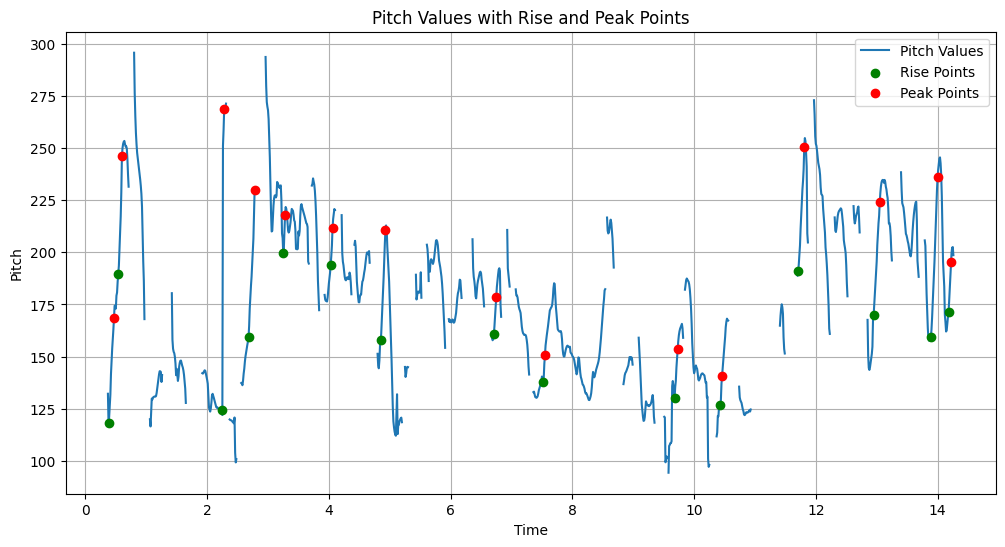

In [291]:
plot_rises_and_peaks(df_test)

In [190]:
#for df_test, give me the min and max intervals between rise_points and peak_points
def min_max_intervals(data):
    rise_points = data[data['rise_point'] == 1].index
    print(rise_points)
    peak_points = data[data['peak_point'] == 1].index
    print(peak_points)
    
    intervals = peak_points - rise_points
    return intervals.min(), intervals.max()

min_max_intervals(df_test)

Index([  37,   43,   52,  105,  222,  266,  270,  305,  323,  350,  402,  480,
        484,  507,  751,  956,  960,  968, 1041, 1171, 1177, 1290, 1293, 1302,
       1355, 1388, 1416],
      dtype='int64')
Index([  42,   45,   58,  106,  226,  269,  275,  306,  326,  351,  404,  481,
        490,  509,  752,  957,  962,  969, 1043, 1175, 1179, 1292, 1300, 1303,
       1356, 1398, 1420],
      dtype='int64')


(1, 10)

In [186]:
count_intonations(df_test)

27

In [86]:
import re

In [293]:
all_pitch_values = glob.glob('../code/pitch_data/*.csv')
all_intonations = []

for file in all_pitch_values:
    df = pd.read_csv(file)
    intonations = count_intonations(df)
    file_name = file.split('/')[-1].split('.')[0]
    # just get the id number from file name
    file_id = re.search(r'(\d+)_pitch_values', file_name).group(1)
    # print(file_id)

    sound = parselmouth.Sound(f'../code/training/influencer_audio/{file_id}.mp3')
    duration = sound.get_total_duration()
    # print(duration)

    intonation_per_15 = intonations / (duration / 15)
    # print(intonation_per_15)

    temp_dict = {'file_name': file_name, 'intonations': intonations, 'duration': duration, 'intonation_per_15': intonation_per_15}
    all_intonations.append(temp_dict)

# all_intonations

In [294]:
df_intonations = pd.DataFrame(all_intonations)
df_intonations

,file_name,intonations,duration,intonation_per_15
0,7236516655826750725_pitch_values,9,12.629093,10.689604
1,7310344854129642757_pitch_values,153,82.376032,27.860046
2,7185585185465879854_pitch_values,54,35.616848,22.742046
3,7171239119006387502_pitch_values,11,18.062562,9.134917
4,7254545022639426822_pitch_values,68,47.554807,21.448936
...,...,...,...,...
95,7021521007458503942_pitch_values,22,17.461746,18.898454
96,7158836355827617029_pitch_values,24,26.839705,13.412964
97,7017066328842358021_pitch_values,24,19.133583,18.815086
98,7217975957972356357_pitch_values,7,14.640522,7.171876


In [296]:
df_intonations['intonation_per_15'].describe()

count    100.000000
mean      16.259331
std        6.769260
min        2.637313
25%       11.998979
50%       15.321833
75%       19.655802
max       39.733384
Name: intonation_per_15, dtype: float64

In [295]:
#export df_intonations to csv
df_intonations.to_csv('../code/pitch_data/amazonfinds_intonations.csv', index=False)

In [29]:
df_intonations = pd.read_csv('../code/pitch_data/amazonfinds_intonations.csv')
df_intonations

,file_name,intonations,duration,intonation_per_15
0,7236516655826750725_pitch_values,9,12.629093,10.689604
1,7310344854129642757_pitch_values,153,82.376032,27.860046
2,7185585185465879854_pitch_values,54,35.616848,22.742046
3,7171239119006387502_pitch_values,11,18.062562,9.134917
4,7254545022639426822_pitch_values,68,47.554807,21.448936
...,...,...,...,...
95,7021521007458503942_pitch_values,22,17.461746,18.898454
96,7158836355827617029_pitch_values,24,26.839705,13.412964
97,7017066328842358021_pitch_values,24,19.133583,18.815086
98,7217975957972356357_pitch_values,7,14.640522,7.171876


# grwm analysis

In [4]:
import os
import subprocess

In [129]:
# Set the directory containing the MP4 files
source_directory = 'videos/grwm'
# Set the directory where you want to save the MP3 files
output_directory = 'videos/grwm/influencer_audio/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through all files in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".mp4"):
        # Full path of the input and output files
        input_path = os.path.join(source_directory, filename)
        output_path = os.path.join(output_directory, filename.replace('.mp4', '.mp3'))
        
        # Command to convert MP4 to MP3
        command = ['ffmpeg', '-i', input_path, '-q:a', '0', '-map', 'a', output_path, '-y']
        
        # Run the command
        subprocess.run(command)

print("Conversion complete!")


ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopenvi

Conversion complete!


[out#0/mp3 @ 0x12b011f80] video:0kB audio:969kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.045945%
size=     970kB time=00:00:54.57 bitrate= 145.6kbits/s speed= 142x    


In [307]:
grwm_audio = glob.glob('videos/grwm/audio/*.mp3')
len(grwm_audio)

83

In [308]:
for file in grwm_audio:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    # print(pitch_values)

    # make pitch.xs() and pitch_values into a dataframe
    df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                                columns=['time', 'pitch'])  #add these lists to pandas in the right order
    
    # Find rise and peak points using gradient
    df_pitch = find_rises_and_peaks_gradient(df_pitch)

    #export df_pitch to csv
    file_name = file.split('/')[-1].split('.')[0]
    df_pitch.to_csv(f'../code/pitch_data/grwm/{file_name}_pitch_values.csv', index=False)

    print(f'{file_name} done!')

7394179400624803103 done!
7369233108656278816 done!
7362966410378874158 done!
7311837094299634987 done!
7249776837990141189 done!
7198124383557143851 done!
7364346057511243051 done!
7340102070550269227 done!
7374159222956756230 done!
7372327511872605482 done!
7358061033434434862 done!
7358179822432111918 done!
7341887513730043166 done!
7393429919268605214 done!
7366005668521856298 done!
7272531412211780907 done!
7392684479933910315 done!
7276946131785927982 done!
7328507053620825390 done!
7317017754874285317 done!
7358223180751850795 done!
7314254763686628650 done!
7326657800522714414 done!
7267135268262530305 done!
7331092594400824618 done!
7393830749180267819 done!
7392415798645558559 done!
7219451520142560558 done!
7324460434076044586 done!
7394132076716428587 done!
7243632895179459886 done!
7310337893245914411 done!
7281739191606611243 done!
7324778813685075246 done!
7295032586341059883 done!
7390798775846980910 done!
7344401364765789482 done!
7292143580284456223 done!
736356591407

In [312]:
df_test = pd.read_csv('../code/pitch_data/grwm/7202674344118537478_pitch_values.csv')

In [313]:
df_test

,time,pitch,rise_point,peak_point
0,0.021995,NaN,0,0
1,0.031995,NaN,0,0
2,0.041995,NaN,0,0
3,0.051995,NaN,0,0
4,0.061995,NaN,0,0
...,...,...,...,...
17615,176.171995,NaN,0,0
17616,176.181995,NaN,0,0
17617,176.191995,NaN,0,0
17618,176.201995,NaN,0,0


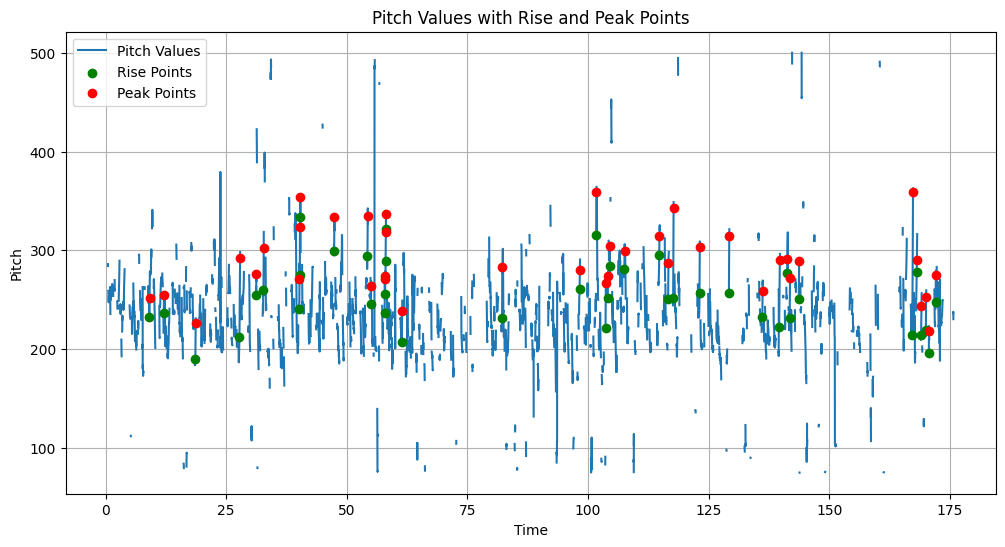

In [314]:
plot_rises_and_peaks(df_test)

In [315]:
count_intonations(df_test)

40

In [303]:
df_test = pd.read_csv('../code/pitch_data/grwm/7243632895179459886_pitch_values.csv')

In [304]:
df_test

,time,pitch,rise_point,peak_point
0,0.020771,NaN,0,0
1,0.030771,NaN,0,0
2,0.040771,NaN,0,0
3,0.050771,NaN,0,0
4,0.060771,NaN,0,0
...,...,...,...,...
10779,107.810771,NaN,0,0
10780,107.820771,NaN,0,0
10781,107.830771,NaN,0,0
10782,107.840771,NaN,0,0


In [316]:
all_pitch_values = glob.glob('../code/pitch_data/grwm/*.csv')
all_intonations = []

for file in all_pitch_values:
    print(file)
    file_name = file.split('/')[-1].split('.')[0]
    # just get the id number from file name
    file_id = re.search(r'(\d+)_pitch_values', file_name).group(1)

    df = pd.read_csv(file)
    intonations = count_intonations(df)


    sound = parselmouth.Sound(f'../code/videos/grwm/audio/{file_id}.mp3')
    duration = sound.get_total_duration()
    # print(duration)

    intonation_per_15 = intonations / (duration / 15)
    # print(intonation_per_15)

    temp_dict = {'file_name': file_name, 'intonations': intonations, 'duration': duration, 'intonation_per_15': intonation_per_15}
    all_intonations.append(temp_dict)

# all_intonations

../code/pitch_data/grwm/7267135268262530305_pitch_values.csv
../code/pitch_data/grwm/7202674344118537478_pitch_values.csv
../code/pitch_data/grwm/7374159222956756230_pitch_values.csv
../code/pitch_data/grwm/7198124383557143851_pitch_values.csv
../code/pitch_data/grwm/7317017754874285317_pitch_values.csv
../code/pitch_data/grwm/7364346057511243051_pitch_values.csv
../code/pitch_data/grwm/7327442011789856042_pitch_values.csv
../code/pitch_data/grwm/7278334911088610606_pitch_values.csv
../code/pitch_data/grwm/7272531412211780907_pitch_values.csv
../code/pitch_data/grwm/7243632895179459886_pitch_values.csv
../code/pitch_data/grwm/7392415798645558559_pitch_values.csv
../code/pitch_data/grwm/7358223180751850795_pitch_values.csv
../code/pitch_data/grwm/7355556865742490926_pitch_values.csv
../code/pitch_data/grwm/7374575565552078123_pitch_values.csv
../code/pitch_data/grwm/7372327511872605482_pitch_values.csv
../code/pitch_data/grwm/7369233108656278816_pitch_values.csv
../code/pitch_data/grwm/

In [317]:
len(all_pitch_values)

83

In [149]:
temp_dict

{'file_name': '7358179822432111918_pitch_values',
 'intonations': 477,
 'duration': 156.40705215419501,
 'intonation_per_15': 45.746019130558075}

In [318]:
df_grwm_intonations = pd.DataFrame(all_intonations)
df_grwm_intonations 

,file_name,intonations,duration,intonation_per_15
0,7267135268262530305_pitch_values,125,106.669909,17.577591
1,7202674344118537478_pitch_values,40,176.233991,3.404565
2,7374159222956756230_pitch_values,26,43.662562,8.932137
3,7198124383557143851_pitch_values,67,86.268277,11.649705
4,7317017754874285317_pitch_values,95,158.601338,8.984792
...,...,...,...,...
78,7341417470663724330_pitch_values,57,179.656032,4.759094
79,7389311347323915566_pitch_values,184,287.411134,9.602968
80,7371388808509689134_pitch_values,17,195.538481,1.304091
81,7390798775846980910_pitch_values,59,146.793991,6.028857


In [319]:
#export df_intonations to csv
df_grwm_intonations.to_csv('../code/pitch_data/grwm/grwm_intonations.csv', index=False)

In [28]:
df_grwm_intonations = pd.read_csv('../code/pitch_data/grwm/grwm_intonations.csv')
df_grwm_intonations

,file_name,intonations,duration,intonation_per_15
0,7267135268262530305_pitch_values,125,106.669909,17.577591
1,7202674344118537478_pitch_values,40,176.233991,3.404565
2,7374159222956756230_pitch_values,26,43.662562,8.932137
3,7198124383557143851_pitch_values,67,86.268277,11.649705
4,7317017754874285317_pitch_values,95,158.601338,8.984792
...,...,...,...,...
78,7341417470663724330_pitch_values,57,179.656032,4.759094
79,7389311347323915566_pitch_values,184,287.411134,9.602968
80,7371388808509689134_pitch_values,17,195.538481,1.304091
81,7390798775846980910_pitch_values,59,146.793991,6.028857


In [320]:
df_grwm_intonations['intonation_per_15'].mean()

8.41079073366614

In [321]:
df_intonations['intonation_per_15'].mean()

16.259331240709145

<Axes: >

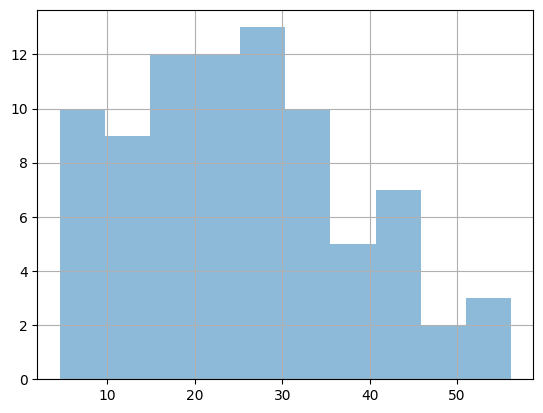

In [153]:
df_grwm_intonations['intonation_per_15'].hist(bins=10, alpha=0.5, label='GRWM')

<Axes: >

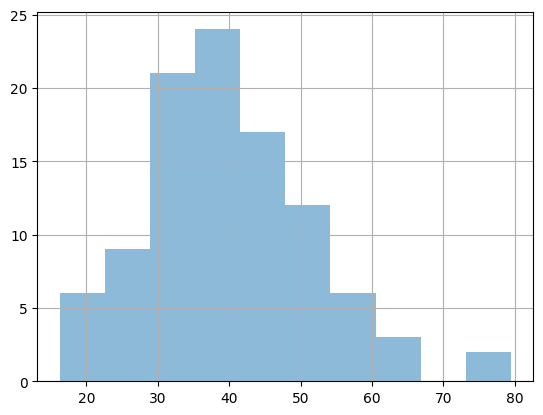

In [119]:
df_intonations['intonation_per_15'].hist(bins=10, alpha=0.5, label='GRWM')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

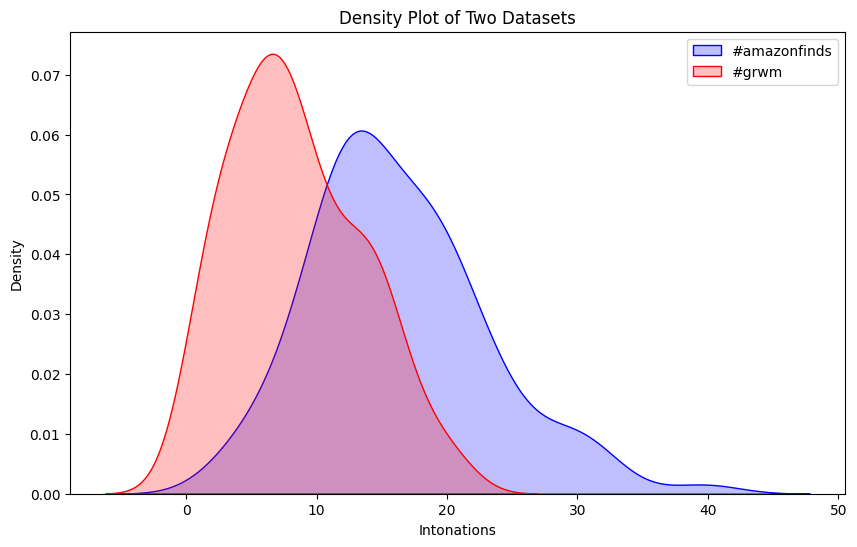

In [322]:
# Create a figure
plt.figure(figsize=(10, 6))

# Density plot for the first dataset
sns.kdeplot(df_intonations['intonation_per_15'], fill=True, label='#amazonfinds', color='blue')

# Density plot for the second dataset
sns.kdeplot(df_grwm_intonations['intonation_per_15'], fill=True, label='#grwm', color='red')

# Add title and labels
plt.title('Density Plot of Two Datasets')
plt.xlabel('Intonations')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# processing booktok

In [156]:
# Set the directory containing the MP4 files
source_directory = 'videos/bookrecs2'
# Set the directory where you want to save the MP3 files
output_directory = 'videos/bookrecs2/audio/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through all files in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".mp4"):
        # Full path of the input and output files
        input_path = os.path.join(source_directory, filename)
        output_path = os.path.join(output_directory, filename.replace('.mp4', '.mp3'))
        
        # Command to convert MP4 to MP3
        command = ['ffmpeg', '-i', input_path, '-q:a', '0', '-map', 'a', output_path, '-y']
        
        # Run the command
        subprocess.run(command)

print("Conversion complete!")


ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopenvi

Conversion complete!


[out#0/mp3 @ 0x1250040d0] video:0kB audio:693kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.064271%
size=     693kB time=00:00:33.67 bitrate= 168.7kbits/s speed= 132x    


In [323]:
bookrec_audio = glob.glob('videos/bookrecs2/audio/*.mp3')
len(bookrec_audio)

75

In [324]:
for file in bookrec_audio:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    # print(pitch_values)

    # make pitch.xs() and pitch_values into a dataframe
    df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                                columns=['time', 'pitch'])  #add these lists to pandas in the right order
    
    # Find rise and peak points using gradient
    df_pitch = find_rises_and_peaks_gradient(df_pitch)

    #export df_pitch to csv
    file_name = file.split('/')[-1].split('.')[0]
    df_pitch.to_csv(f'../code/pitch_data/bookrecs2/{file_name}_pitch_values.csv', index=False)

    print(f'{file_name} done!')

7326215274233892127 done!
7356038668194172206 done!
7393772132934765854 done!
7257698617966791978 done!
7347828200753483039 done!
7319647306595257642 done!
7270658065752395051 done!
7257183546362662187 done!
7390461645258116395 done!
7372629265851878699 done!
7376083784275332398 done!
7360064758956969259 done!
7359299636139412782 done!
7354083757772557611 done!
7382285833417608454 done!
7393052082581916971 done!
7371299242075262254 done!
7258790041474927918 done!
7278439753203207467 done!
7222453177890147630 done!
7363749993758330154 done!
7288523866446630174 done!
7200447378254499077 done!
7390934628724591918 done!
7382743508928433451 done!
7333300706289470753 done!
7312281982019341610 done!
7209030204805614894 done!
7314444517221109038 done!
7313334711596895534 done!
7338194698655386885 done!
7344775987466341675 done!
7351548823702883627 done!
7384833760866454814 done!
7347167896663100714 done!
7320782185550679338 done!
7288699360202820870 done!
7318587051773791531 done!
729960255937

In [325]:
df_test = pd.read_csv('../code/pitch_data/bookrecs2/7242372071135743259_pitch_values.csv')

In [326]:
df_test

,time,pitch,rise_point,peak_point
0,0.024444,NaN,0,0
1,0.034444,NaN,0,0
2,0.044444,NaN,0,0
3,0.054444,NaN,0,0
4,0.064444,NaN,0,0
...,...,...,...,...
23735,237.374444,NaN,0,0
23736,237.384444,NaN,0,0
23737,237.394444,NaN,0,0
23738,237.404444,NaN,0,0


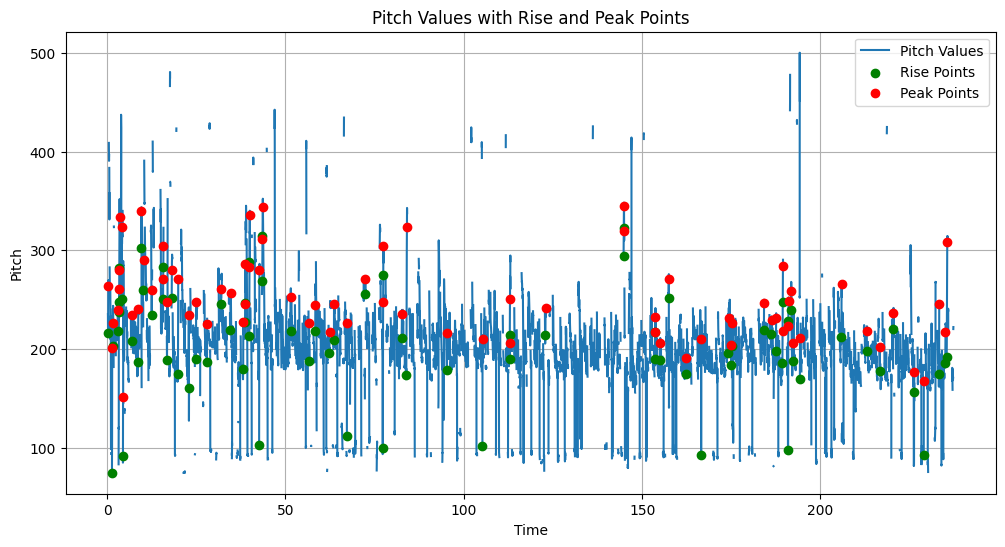

In [327]:
plot_rises_and_peaks(df_test)

In [328]:
count_intonations(df_test)

78

In [329]:
all_pitch_values = glob.glob('../code/pitch_data/bookrecs2/*.csv')
all_intonations = []

for file in all_pitch_values:
    print(file)
    file_name = file.split('/')[-1].split('.')[0]
    # just get the id number from file name
    file_id = re.search(r'(\d+)_pitch_values', file_name).group(1)

    df = pd.read_csv(file)
    intonations = count_intonations(df)


    sound = parselmouth.Sound(f'../code/videos/bookrecs2/audio/{file_id}.mp3')
    duration = sound.get_total_duration()
    # print(duration)

    intonation_per_15 = intonations / (duration / 15)
    # print(intonation_per_15)

    temp_dict = {'file_name': file_name, 'intonations': intonations, 'duration': duration, 'intonation_per_15': intonation_per_15}
    all_intonations.append(temp_dict)

# all_intonations

../code/pitch_data/bookrecs2/7306201830168481054_pitch_values.csv
../code/pitch_data/bookrecs2/7320782185550679338_pitch_values.csv
../code/pitch_data/bookrecs2/7288699360202820870_pitch_values.csv
../code/pitch_data/bookrecs2/7319647306595257642_pitch_values.csv
../code/pitch_data/bookrecs2/7376083784275332398_pitch_values.csv
../code/pitch_data/bookrecs2/7351549208228580654_pitch_values.csv
../code/pitch_data/bookrecs2/7257698617966791978_pitch_values.csv
../code/pitch_data/bookrecs2/7244229543853083909_pitch_values.csv
../code/pitch_data/bookrecs2/7299602559377984811_pitch_values.csv
../code/pitch_data/bookrecs2/7367504345836850478_pitch_values.csv
../code/pitch_data/bookrecs2/7338194698655386885_pitch_values.csv
../code/pitch_data/bookrecs2/7339685407170514222_pitch_values.csv
../code/pitch_data/bookrecs2/7386379881363361032_pitch_values.csv
../code/pitch_data/bookrecs2/7390934628724591918_pitch_values.csv
../code/pitch_data/bookrecs2/7378527790661930283_pitch_values.csv
../code/pi

In [330]:
df_bookrecs_intonations = pd.DataFrame(all_intonations)
df_bookrecs_intonations 

,file_name,intonations,duration,intonation_per_15
0,7306201830168481054_pitch_values,82,150.372766,8.179673
1,7320782185550679338_pitch_values,59,199.561338,4.434727
2,7288699360202820870_pitch_values,49,91.623379,8.021970
3,7319647306595257642_pitch_values,4,15.476440,3.876861
4,7376083784275332398_pitch_values,50,89.820930,8.349947
...,...,...,...,...
70,7394558056274709803_pitch_values,31,53.876440,8.630860
71,7278439753203207467_pitch_values,2,76.028277,0.394590
72,7394604979799002399_pitch_values,220,437.850317,7.536822
73,7363749993758330154_pitch_values,60,44.132766,20.393011


In [331]:
#export df_bookrecs_intonations to csv
df_bookrecs_intonations.to_csv('../code/pitch_data/bookrecs2/bookrecs_intonations.csv', index=False)

In [332]:
df_bookrecs_intonations['intonation_per_15'].mean()

7.9053740655889015

In [27]:
df_bookrecs_intonations = pd.read_csv('../code/pitch_data/bookrecs2/bookrecs_intonations.csv')
df_bookrecs_intonations

,file_name,intonations,duration,intonation_per_15
0,7306201830168481054_pitch_values,82,150.372766,8.179673
1,7320782185550679338_pitch_values,59,199.561338,4.434727
2,7288699360202820870_pitch_values,49,91.623379,8.021970
3,7319647306595257642_pitch_values,4,15.476440,3.876861
4,7376083784275332398_pitch_values,50,89.820930,8.349947
...,...,...,...,...
70,7394558056274709803_pitch_values,31,53.876440,8.630860
71,7278439753203207467_pitch_values,2,76.028277,0.394590
72,7394604979799002399_pitch_values,220,437.850317,7.536822
73,7363749993758330154_pitch_values,60,44.132766,20.393011


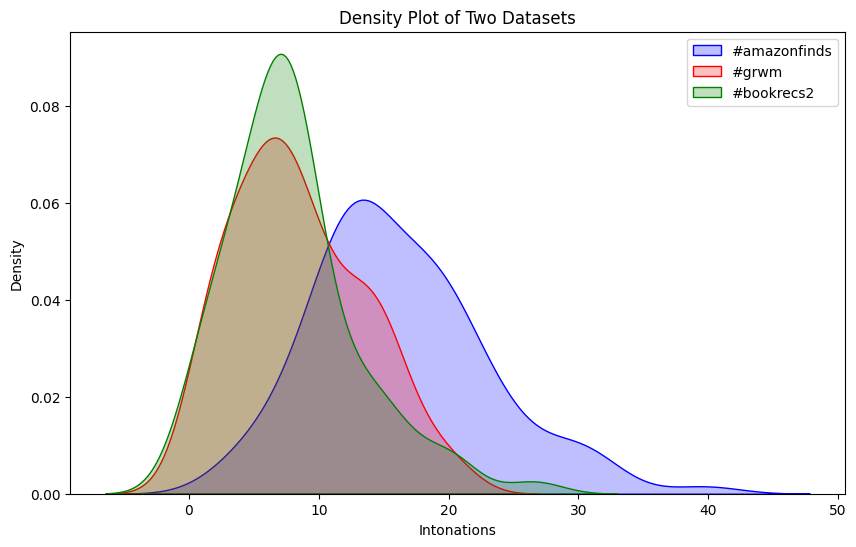

In [333]:
# Create a figure
plt.figure(figsize=(10, 6))

# Density plot for the first dataset
sns.kdeplot(df_intonations['intonation_per_15'], fill=True, label='#amazonfinds', color='blue')

# Density plot for the second dataset
sns.kdeplot(df_grwm_intonations['intonation_per_15'], fill=True, label='#grwm', color='red')

# Density plot for the third dataset
sns.kdeplot(df_bookrecs_intonations['intonation_per_15'], fill=True, label='#bookrecs2', color='green')

# Add title and labels
plt.title('Density Plot of Two Datasets')
plt.xlabel('Intonations')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# processing storytime

In [5]:
# Set the directory containing the MP4 files
source_directory = 'videos/storytime'
# Set the directory where you want to save the MP3 files
output_directory = 'videos/storytime/audio/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through all files in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".mp4"):
        # Full path of the input and output files
        input_path = os.path.join(source_directory, filename)
        output_path = os.path.join(output_directory, filename.replace('.mp4', '.mp3'))
        
        # Command to convert MP4 to MP3
        command = ['ffmpeg', '-i', input_path, '-q:a', '0', '-map', 'a', output_path, '-y']
        
        # Run the command
        subprocess.run(command)

print("Conversion complete!")


ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopenvi

Conversion complete!


[out#0/mp3 @ 0x121815630] video:0kB audio:4389kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.010147%
size=    4389kB time=00:03:55.73 bitrate= 152.5kbits/s speed= 143x    


In [6]:
bookrec_audio = glob.glob('videos/storytime/audio/*.mp3')
len(bookrec_audio)

63

In [13]:
for file in bookrec_audio:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    # print(pitch_values)

    # make pitch.xs() and pitch_values into a dataframe
    df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]), 
                                columns=['time', 'pitch'])  #add these lists to pandas in the right order
    
    # Find rise and peak points using gradient
    df_pitch = find_rises_and_peaks_gradient(df_pitch)

    #export df_pitch to csv
    file_name = file.split('/')[-1].split('.')[0]
    df_pitch.to_csv(f'../code/pitch_data/storytime/{file_name}_pitch_values.csv', index=False)

    print(f'{file_name} done!')

7148471887763574022 done!
7394887593613085982 done!
7357816559865220395 done!
7375596799760846123 done!
7187992844739579182 done!
7290994816555535648 done!
7357807986170957099 done!
7341918758727961899 done!
7343014651367525675 done!
7336318763299523882 done!
7341843567477902634 done!
7390188974024723743 done!
7373728223101766955 done!
7349784236745952543 done!
7372326235298385195 done!
7394850344083197214 done!
7344175324252474670 done!
7366729382314003754 done!
7221252973941280005 done!
7251348034192428334 done!
7283910300804369694 done!
7324054523721518382 done!
7275109806053018923 done!
7338664339655740702 done!
6891661268936117510 done!
7377857805409094954 done!
7270212353575374126 done!
7207635437840600366 done!
7394901674269166894 done!
7233885561994399022 done!
7350339800630693162 done!
7176753252539649322 done!
7377513781791853867 done!
7370796478119333162 done!
7394879095525379358 done!
7343422201548360990 done!
7358292324868246815 done!
7368935343837596974 done!
737263422974

In [15]:
df_test = pd.read_csv('../code/pitch_data/storytime/7343041465393696001_pitch_values.csv')

In [16]:
df_test

,time,pitch,rise_point,peak_point
0,0.023526,NaN,0,0
1,0.033526,NaN,0,0
2,0.043526,NaN,0,0
3,0.053526,NaN,0,0
4,0.063526,NaN,0,0
...,...,...,...,...
23568,235.703526,NaN,0,0
23569,235.713526,NaN,0,0
23570,235.723526,NaN,0,0
23571,235.733526,NaN,0,0


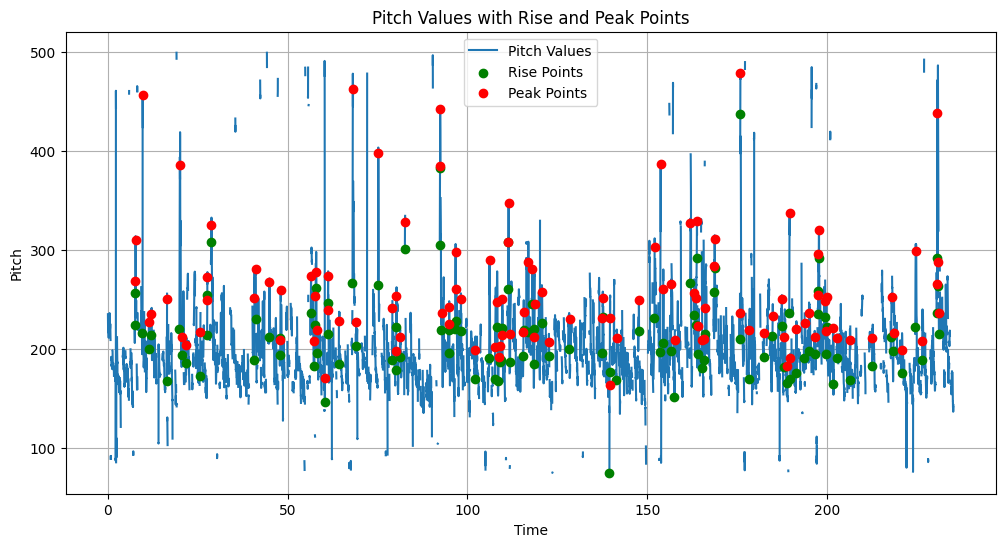

In [19]:
plot_rises_and_peaks(df_test)

In [20]:
count_intonations(df_test)

117

In [22]:
import re

In [23]:
all_pitch_values = glob.glob('../code/pitch_data/storytime/*.csv')
all_intonations = []

for file in all_pitch_values:
    print(file)
    file_name = file.split('/')[-1].split('.')[0]
    # just get the id number from file name
    file_id = re.search(r'(\d+)_pitch_values', file_name).group(1)

    df = pd.read_csv(file)
    intonations = count_intonations(df)


    sound = parselmouth.Sound(f'../code/videos/storytime/audio/{file_id}.mp3')
    duration = sound.get_total_duration()
    # print(duration)

    intonation_per_15 = intonations / (duration / 15)
    # print(intonation_per_15)

    temp_dict = {'file_name': file_name, 'intonations': intonations, 'duration': duration, 'intonation_per_15': intonation_per_15}
    all_intonations.append(temp_dict)

# all_intonations

../code/pitch_data/storytime/7278063994366381358_pitch_values.csv
../code/pitch_data/storytime/7207635437840600366_pitch_values.csv
../code/pitch_data/storytime/7357865762192821550_pitch_values.csv
../code/pitch_data/storytime/7343014651367525675_pitch_values.csv
../code/pitch_data/storytime/7187992844739579182_pitch_values.csv
../code/pitch_data/storytime/7275109806053018923_pitch_values.csv
../code/pitch_data/storytime/7390188974024723743_pitch_values.csv
../code/pitch_data/storytime/7341843567477902634_pitch_values.csv
../code/pitch_data/storytime/7357816559865220395_pitch_values.csv
../code/pitch_data/storytime/7208651318477458734_pitch_values.csv
../code/pitch_data/storytime/7323708527359495470_pitch_values.csv
../code/pitch_data/storytime/7221252973941280005_pitch_values.csv
../code/pitch_data/storytime/7394887593613085982_pitch_values.csv
../code/pitch_data/storytime/7349784236745952543_pitch_values.csv
../code/pitch_data/storytime/7372634229747928366_pitch_values.csv
../code/pi

In [24]:
df_storytime_intonations = pd.DataFrame(all_intonations)
df_storytime_intonations 

,file_name,intonations,duration,intonation_per_15
0,7278063994366381358_pitch_values,33,47.920522,10.329604
1,7207635437840600366_pitch_values,56,169.886236,4.944485
2,7357865762192821550_pitch_values,52,75.976032,10.266396
3,7343014651367525675_pitch_values,178,237.073175,11.262345
4,7187992844739579182_pitch_values,86,137.233175,9.400059
...,...,...,...,...
58,7269864676710763819_pitch_values,91,114.428277,11.928870
59,7003446750191127814_pitch_values,120,56.096848,32.087364
60,7211504104420543746_pitch_values,190,165.288685,17.242560
61,7292858237857189162_pitch_values,84,180.178481,6.993066


In [31]:
#export df_bookrecs_intonations to csv
df_storytime_intonations.to_csv('../code/pitch_data/storytime/storytime_intonations.csv', index=False)

In [26]:
df_storytime_intonations['intonation_per_15'].mean()

11.321004833164125

In [42]:
df_intonations['intonation_per_15'].min()

2.6373126919925767

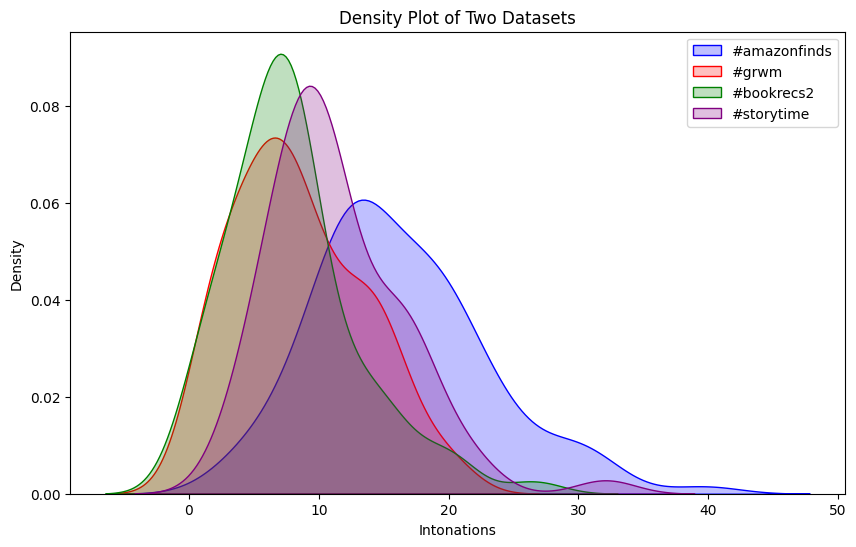

In [30]:
# Create a figure
plt.figure(figsize=(10, 6))

# Density plot for the first dataset
sns.kdeplot(df_intonations['intonation_per_15'], fill=True, label='#amazonfinds', color='blue')

# Density plot for the second dataset
sns.kdeplot(df_grwm_intonations['intonation_per_15'], fill=True, label='#grwm', color='red')

# Density plot for the third dataset
sns.kdeplot(df_bookrecs_intonations['intonation_per_15'], fill=True, label='#bookrecs2', color='green')

# Density plot for the fourth dataset
sns.kdeplot(df_storytime_intonations['intonation_per_15'], fill=True, label='#storytime', color='purple')

# Add title and labels
plt.title('Density Plot of Two Datasets')
plt.xlabel('Intonations')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [36]:
df_intonations['intonation_per_15'].median()

15.321832913156367

In [39]:
#export df as json
df.to_json('../code/pitch_data/test_intonations.json', orient='records')
